<a href="https://colab.research.google.com/github/zinc0des/Analysis-of-KDD-Cup-1998-dataset/blob/master/PVA_Satavisha_Roy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import re
import itertools

import seaborn as sns

from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.model_selection import GridSearchCV

import graphviz


from sklearn.base import TransformerMixin
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
learn = pd.read_csv("cup98LRN.txt")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
learn.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [10]:
learn.columns

Index(['ODATEDW', 'OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE',
       'DOB', 'NOEXCH', 'RECINHSE',
       ...
       'TARGET_D', 'HPHONE_D', 'RFA_2R', 'RFA_2F', 'RFA_2A', 'MDMAUD_R',
       'MDMAUD_F', 'MDMAUD_A', 'CLUSTER2', 'GEOCODE2'],
      dtype='object', length=481)

In [11]:
learn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 481 entries, ODATEDW to GEOCODE2
dtypes: float64(97), int64(310), object(74)
memory usage: 350.1+ MB


In [12]:
learn.describe()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,71747.000000,12386.000000,74126.000000,50680.000000,95412.000000,42558.000000,42558.000000,...,95412.000000,85439.000000,85439.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95280.000000
mean,9141.363256,54.223117,2723.602933,61.611649,1.527773,3.886248,5.345699,3.321438,0.152075,0.059166,...,9135.651648,9151.022917,8.093739,13.347786,95778.176959,0.050759,0.793073,0.500618,1.910053,31.533711
std,343.454752,953.844476,2132.241295,16.664199,0.806861,1.854960,2.742490,9.306899,0.470023,0.262078,...,320.394019,294.257260,8.213242,10.769997,55284.596094,0.219506,4.429725,0.500002,1.072749,18.764614
min,8306.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7211.000000,0.000000,1.285714,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,8801.000000,0.000000,201.000000,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,8810.000000,8903.000000,4.000000,8.384615,47910.750000,0.000000,0.000000,0.000000,1.000000,15.000000
50%,9201.000000,1.000000,2610.000000,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,...,9201.000000,9204.000000,6.000000,11.636364,95681.500000,0.000000,0.000000,1.000000,2.000000,32.000000
75%,9501.000000,2.000000,4601.000000,75.000000,2.000000,5.000000,8.000000,3.000000,0.000000,0.000000,...,9409.000000,9409.000000,11.000000,15.477955,143643.500000,0.000000,0.000000,1.000000,3.000000,49.000000
max,9701.000000,72002.000000,9710.000000,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,4.000000,...,9603.000000,9702.000000,1088.000000,1000.000000,191779.000000,1.000000,200.000000,1.000000,4.000000,62.000000


In [13]:
learn.isna()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
def sum_na():
    if learn.isnull().any().sum() > 0:
      return learn.isnull().any().sum()
print("Number of variables with null values:", sum_na()) 


Number of variables with null values: 92


In [17]:
[col for col in learn.columns if learn[col].isnull().any()]

['AGE',
 'NUMCHLD',
 'INCOME',
 'WEALTH1',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'WEALTH2',
 'MSA',
 'ADI',
 'DMA',
 'ADATE_3',
 'ADATE_4',
 'ADATE_5',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_10',
 'ADATE_11',
 'ADATE_12',
 'ADATE_13',
 'ADATE_14',
 'ADATE_15',
 'ADATE_16',
 'ADATE_17',
 'ADATE_18',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_8',
 'RDATE_9',
 'RDATE_10',
 'RDATE_11',
 'RDATE_12',
 'RDATE_13',
 'RDATE_14',
 'RDATE_15',
 'RDATE_16',
 'RDATE_17',
 'RDATE_18',
 'RDATE_19',
 'RDATE_20',
 'RDATE_21',
 'RDATE_22',
 'RDATE_23',
 'RDATE_24',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_8',
 'RAMNT_9',
 'RAMNT_10',
 'RAMNT_11',
 'RAMNT_12',
 'RAMNT_13',
 'RAMNT_14',
 'RAMNT_15',
 'RAMNT_16',
 'RAMNT_17',
 '

In [0]:
pd.options.display.max_rows = 480

In [19]:
learn.isna().sum()

ODATEDW         0
OSOURCE         0
TCODE           0
STATE           0
ZIP             0
MAILCODE        0
PVASTATE        0
DOB             0
NOEXCH          0
RECINHSE        0
RECP3           0
RECPGVG         0
RECSWEEP        0
MDMAUD          0
DOMAIN          0
CLUSTER         0
AGE         23665
AGEFLAG         0
HOMEOWNR        0
CHILD03         0
CHILD07         0
CHILD12         0
CHILD18         0
NUMCHLD     83026
INCOME      21286
GENDER          0
WEALTH1     44732
HIT             0
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
DATASRCE        0
MALEMILI        0
MALEVET         0
VIETVETS        0
WWIIVETS        0
LOCALGOV        0
STATEGOV        0
FEDGOV          0
SOLP3           0
SOLIH           0
MAJOR           0
WEALTH2     43823
GEOCODE         0
COLLECT1  

In [20]:
learn.shape

(95412, 481)

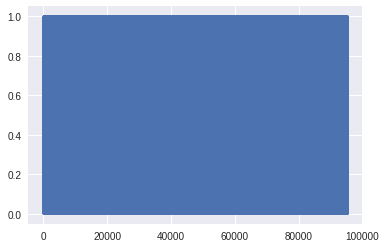

In [21]:
plt.plot(learn.TARGET_B)

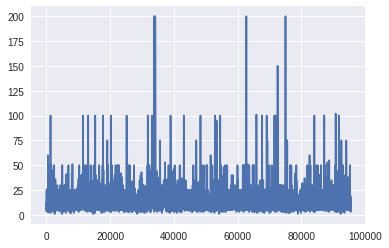

In [22]:
plt.plot(learn[learn.TARGET_D > 0].TARGET_D)

# Correlation between TARGET_B and the predictors

In [23]:
TARGET_B_corr = learn.corr()["TARGET_B"].copy()
TARGET_B_corr.sort_values(inplace=True, ascending = False)
TARGET_B_corr

TARGET_B    1.000000
TARGET_D    0.774232
RFA_2F      0.072311
CARDGIFT    0.054027
NGIFTALL    0.050896
RAMNT_4     0.041755
LASTDATE    0.041158
NUMPROM     0.033161
CARDPROM    0.032467
HV2         0.025607
HV1         0.025012
HVP4        0.024186
HVP3        0.024175
HVP2        0.023514
HVP1        0.022948
DMA         0.022425
HVP5        0.022034
IC5         0.020553
IC4         0.020535
HHAS3       0.020252
HV3         0.020191
HV4         0.020085
RP2         0.019928
HVP6        0.019869
IC2         0.019828
CARDPM12    0.019615
IC3         0.019420
RP1         0.019158
INCOME      0.018688
NUMPRM12    0.018639
WEALTH2     0.018265
MHUC1       0.018195
IC1         0.018137
RP3         0.017939
EC7         0.017818
ETH1        0.017311
HHN2        0.017097
IC11        0.016961
AGE901      0.016562
EC8         0.016443
RDATE_8     0.016309
RDATE_7     0.016190
IC13        0.015850
IC20        0.015347
IC14        0.014884
IC23        0.014821
RAMNTALL    0.014651
OCC1        0

# Correlation between TARGET_D and the predictors

In [24]:
TARGET_D_corr = learn.corr()["TARGET_D"].copy()
TARGET_D_corr.sort_values(inplace=True, ascending = False)
TARGET_D_corr

TARGET_D    1.000000
TARGET_B    0.774232
RAMNT_4     0.268811
RAMNT_21    0.099339
RAMNT_9     0.090168
RAMNT_14    0.084498
RAMNT_22    0.081324
RAMNT_8     0.081060
RAMNT_12    0.062226
LASTGIFT    0.061678
RAMNT_13    0.059044
RAMNT_11    0.058992
RAMNT_24    0.055679
RAMNT_18    0.049268
RAMNT_7     0.048949
RAMNT_3     0.046038
RAMNT_15    0.045292
RAMNTALL    0.044810
AVGGIFT     0.044299
RAMNT_10    0.044275
RAMNT_23    0.042966
RAMNT_19    0.042596
HV2         0.039860
MAXRAMNT    0.039224
HV1         0.039081
IC5         0.037328
IC4         0.035952
HVP1        0.035650
IC2         0.035496
HVP3        0.035436
HVP2        0.035330
HVP4        0.034938
IC3         0.033786
HVP6        0.032999
RAMNT_17    0.032238
INCOME      0.032063
IC1         0.031780
EC8         0.031167
WEALTH2     0.030999
HV3         0.030915
HV4         0.030867
RP2         0.030414
MHUC1       0.029830
HVP5        0.029746
RP1         0.029542
IC21        0.029089
IC11        0.028976
EC7         0

# Variable distribution

##[1:28] # demographics
##[29:42] # response to other types of mail orders
##[43:55] # overlay data
##[56:74] # donor interests
##[75] # PEP star RFA status
##[76:361] # characteristics of donor neighborhood
##[362:407] # promotion history
##[408:412] # summary variables of promotion history
##[413:456] # giving history
##[457:469] # summary variables of giving history
##[470:473] ## ID & TARGETS
##[474:479] # RFA (recency-frequency-donation amount)
##[480:481] # cluster & geocode


Percentage of Donors

In [27]:
print('Percentage of donors: ',
        100* sum(learn.TARGET_B == 1) / learn.shape[0], "%") 

Percentage of donors:  5.075881440489666 %


In [28]:
sum(learn.TARGET_B == 0)

90569

In [29]:
sum(learn.TARGET_B == 1)

4843

In [30]:
learn.TARGET_B.mean()

0.05075881440489666

In [31]:
learn.TARGET_D.mean()

0.7930731983398315

# This data is quite noisy, high dimensional, with lots of missing values and just with 5% of positive cases. Feature selection and preprocessing will be vital for good modelling.

In [32]:
np.var(learn)

ODATEDW     1.179599e+05
TCODE       9.098097e+05
DOB         4.546405e+06
AGE         2.776916e+02
NUMCHLD     6.509725e-01
INCOME      3.440828e+00
WEALTH1     7.521100e+00
HIT         8.661746e+01
MBCRAFT     2.209167e-01
MBGARDEN    6.868319e-02
MBBOOKS     2.788725e+00
MBCOLECT    8.841112e-02
MAGFAML     6.740419e-01
MAGFEM      1.450936e-01
MAGMALE     7.639399e-02
PUBGARDN    2.405000e-01
PUBCULIN    1.830276e-01
PUBHLTH     1.562190e+00
PUBDOITY    5.308041e-01
PUBNEWFN    9.207588e-01
PUBPHOTO    6.074802e-03
PUBOPP      7.719885e-01
MALEMILI    2.565925e+01
MALEVET     1.315722e+02
VIETVETS    2.279397e+02
WWIIVETS    3.136077e+02
LOCALGOV    1.928682e+01
STATEGOV    2.628194e+01
FEDGOV      1.726524e+01
WEALTH2     7.855305e+00
POP901      3.298420e+07
POP902      2.126043e+06
POP903      4.507490e+06
POP90C1     2.249655e+03
POP90C2     9.748079e+02
POP90C3     1.603013e+03
POP90C4     3.097535e+01
POP90C5     3.327364e+01
ETH1        4.415783e+02
ETH2        2.785789e+02


In [0]:
def get_redundant_vars(target, dat):
    '''
    This method outputs a set of redundant variables.
    '''

    # Some vars that don't seem of good value
    redundant_vars = ['CONTROLN', 'ZIP']

    # Identifies numerical variables with variance zero < 0.1%
    #sel = feature_selection.VarianceThreshold(threshold = 0.001)
    #sel.fit_transform(dat)
    dat_var = dat.var()
    redundant_vars.extend(dat_var.index[dat_var < 0.001])

    # Identifies variables that are too sparse (less than 1%)
    idxs = dat.count() < int(dat.shape[0] * .01)
    redundant_vars.extend(dat.columns[idxs])

    # Identifies variables that are strongly correlated with others
    #redundant_vars.extend(Analyser.get_corr_vars(dat, corr_val = 0.9))

    return redundant_vars

In [0]:
target= 'TARGET_B'

In [0]:
def get_important_vars(target, dat):
        '''
        This method does Feature Selection.
        '''

        # Balances the dataset
        idxs_pos = dat[target] == 1
        pos = dat[idxs_pos]
        neg = dat[dat[target] == 0][1:sum(idxs_pos)]

        # Concatenates pos and neg, it's already shuffled
        sub_dat = pos.append(neg, ignore_index = True)

        # Imputes the data and fills in the missing values
        sub_dat = Preprocessor.fill_nans(sub_dat)

        # Changes categorical vars to a numerical form
        X = pd.get_dummies(sub_dat)

        #### Correlation-based Feature Selection ####

        # Computes correlation between cfg['target'] and the predictors
        target_corr = X.corr()[target].copy()
        target_corr.sort_values(inplace=True, ascending = False)

        # Sorts and picks the first x features
        # TODO: get optimal x value automatically
        tmp = abs(target_corr).copy()
        tmp.sort_values(inplace=True, ascending = False)
        important_vars = [tmp.index[0]]
        important_vars.extend(list(tmp.index[2:52])) # removes other target

        #### Variance-based Feature Selection ####

        #sel = VarianceThreshold(threshold = 0.005)
        #X_new = sel.fit_transform(X)

        #### Univariate Feature Selection ####

        #y = X.TARGET_B
        #X = X.drop("TARGET_B", axis = 1)

        #X_new = SelectKBest(chi2, k = 10).fit_transform(X.values, y.values)

        #### Tree-based Feature Selection ####

        #clf = ExtraTreesClassifier()
        #X_new = clf.fit(X.values, y.values).transform(X.values)

        #aux = dict(zip(X.columns, clf.feature_importances_))
        #important_vars = [i[0] for i in sorted(
        #    aux.items(), key = operator.itemgetter(0))]

        return important_vars

In [0]:
# Gets some redundant variables based on variance, sparsity & common sense
redundant_vars = get_redundant_vars(target, learn)

In [0]:
# Drops redundant cols
learn_remvar = learn.drop(redundant_vars, axis = 1)

In [0]:
# Imputes the data and fills in the missing values
learn_remvar = Preprocessor.fill_nans(learn_remvar)

In [41]:
# Shuffles observations
learn_remvar.apply(np.random.permutation)

,ODATEDW,OSOURCE,TCODE,STATE,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,9301,,0,MN,,,0,0,,,...,0.0,1,L,1,G,X,X,X,1.0,D
1,8601,L25,2,WI,,,3601,0,,,...,0.0,0,L,1,F,X,X,X,11.0,B
2,8901,RPH,1,SC,,,5101,0,,,...,0.0,0,L,3,F,X,X,X,41.0,D
3,9501,UCA,2,WI,,,6801,0,,,...,0.0,1,L,4,F,X,X,X,56.0,D
4,8801,DNA,1002,IA,,,0,0,,,...,0.0,0,L,3,F,X,X,X,60.0,D
5,8601,MBC,1,OR,,,2901,0,,,...,0.0,0,L,1,E,X,X,X,55.0,A
6,9001,AP1,0,AZ,,,5401,0,,,...,0.0,1,L,4,F,X,X,X,39.0,A
7,9601,SGI,1,CA,,,3205,0,X,,...,0.0,0,L,1,F,X,X,X,11.0,C
8,9601,AMB,28,WI,,,0,0,,,...,0.0,0,L,1,D,X,X,X,55.0,B
9,8601,SUN,1,IL,,,0,0,,,...,0.0,1,L,4,D,X,X,X,49.0,C


In [0]:
# Gets important variables
important_vars = get_important_vars(target, learn_remvar)

In [0]:
# Changes categorical vars to a numerical form
feats = pd.get_dummies(learn_remvar)

In [0]:
# Drops the non-important variables
feats = feats[important_vars]

In [0]:
# Does train/test datasets, 70% and 30% respectively
cut = int(feats.shape[0] * .7)

In [0]:
x_tr = feats[1:cut].drop(['TARGET_B'], axis = 1)
y_tr = feats.TARGET_B[1:cut]

x_ts = feats[(cut + 1):-1].drop(['TARGET_B'], axis = 1)
y_ts = feats.TARGET_B[(cut + 1):-1]

In [0]:
# # Creates a balanced trainset
# # In regression, some methods perform better with bal datasets,
# # particularly tree-based methods like decision trees and random forests.
# pos = train[y_train == 1]
# neg = train[y_train == 0][1:pos.shape[0]]
# y_train_bal = [1] * pos.shape[0]
# y_train_bal.extend([0] * neg.shape[0])
# train_bal = pos.append(neg, ignore_index = True)

# Target Distribution

In [48]:
print('Number of obs in learning data:',len(learn))

respond= pd.value_counts(learn['TARGET_B'])
print(respond)
print(4843+90569-len(learn) )
print('no missing values for TARGET_B')
print('only', 4843/95412*100, '% donors respond')

Number of obs in learning data: 95412
0    90569
1     4843
Name: TARGET_B, dtype: int64
0
no missing values for TARGET_B
only 5.075881440489666 % donors respond


# Encode categorical data into numerical

In [49]:
from sklearn import preprocessing

#First, find all string columns
string=learn.select_dtypes(['object'])
print('number of string column:',len(string.columns))

#remove all space in string data
learn[string.columns] = string.apply(lambda x: x.str.strip())

# label encoder
for x in string.columns:
    le = preprocessing.LabelEncoder()
    learn[x][learn[x].isnull()] = 'NaN' # replace missing value into NaN
    le.fit(learn[x])
    learn[x]=le.transform(learn[x]) 
    
#check again
string=learn.select_dtypes(['object'])
print('number of string column:',len(string.columns))

# Convert values back to their category names
#list(le.inverse_transform(x))

number of string column: 74


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


number of string column: 0


# Feature Selection

In [50]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

X=learn.drop('TARGET_B', axis=1)
# X=learn.drop('TARGET_D', axis=1)
Y=learn.TARGET_B

X = X.fillna(-1,axis=1)

clf = ExtraTreesClassifier(n_estimators=1000,random_state =1234)
clf = clf.fit(X, Y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape)


# get the column names back for X_new
count=0
feature= list()
for col in model.get_support():
    if col == True:
        feature.append(count) 
    count = count +1
print(len(feature))

name=learn.columns[feature]

X_new= pd.DataFrame(X_new, columns=name)
#X_new

(95412, 18)
18


# Oversampling to 70/30

In [51]:
from sklearn.utils import resample


x1=X_new[X_new.TARGET_B==1]
y0=X_new[X_new.TARGET_B==0]

oversampled = resample(x1,replace=True,n_samples=38826,random_state=123) 
df = pd.concat([oversampled, y0])
new_rate=pd.value_counts(df['TARGET_B'])
print(new_rate)
print('now', 38826/len(df)*100, '% donors respond in our new oversampled dataset')
print('Number of obs in new dataset:',len(df))

0.0    90569
1.0    38826
Name: TARGET_B, dtype: int64
now 30.005796205417518 % donors respond in our new oversampled dataset
Number of obs in new dataset: 129395


# Data Partition

In [90]:
# df_train 70%
# df_val   30%
from sklearn.model_selection import train_test_split

X, y = df.drop('TARGET_B', axis=1), df.TARGET_B

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
print(len(y_train[y_train==1])/len(y_train))

0.30006845080374495


In [91]:
X.shape

(129395, 17)

In [92]:
y.shape

(129395,)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Modeling the data

# Logistic *Regression*

In [95]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit = sm.Logit(y_train, X_train)

# fit the model
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.264816
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:               TARGET_B   No. Observations:                90576
Model:                          Logit   Df Residuals:                    90559
Method:                           MLE   Df Model:                           16
Date:                Sun, 24 Mar 2019   Pseudo R-squ.:                  0.5665
Time:                        22:48:17   Log-Likelihood:                -23986.
converged:                       True   LL-Null:                       -55335.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
TCODE         -0.0067      0.001     -9.523      0.000      -0.008      -0.005
POP901         0.0017   3.76

In [0]:
# pva_pred_logit = logit.predict(x_tr)

# cnf_matrix = confusion_matrix(y_tr, pva_pred_logit)
# np.set_printoptions(precision=2)

# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=[[0, 1]], title ='Confusion matrix: Decision Tree')

In [96]:
logit = sm.Logit(y_test, X_test)

# fit the model
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.269547
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               TARGET_B   No. Observations:                38819
Model:                          Logit   Df Residuals:                    38802
Method:                           MLE   Df Model:                           16
Date:                Sun, 24 Mar 2019   Pseudo R-squ.:                  0.5588
Time:                        22:48:22   Log-Likelihood:                -10464.
converged:                       True   LL-Null:                       -23714.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
TCODE         -0.0050      0.001     -7.881      0.000      -0.006      -0.004
POP901         0.0015   5.36

In [97]:
clf_log = LogisticRegression()
clf_log = clf_log.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [98]:
X_train.shape

(90576, 17)

In [99]:
y_train.shape

(90576,)

In [100]:
y_test.shape

(38819,)

In [102]:
X_test.shape

(38819, 17)

In [0]:
# y_test = y_test.reshape(1,-1)
pva_pred_log = clf_log.predict(X_test)

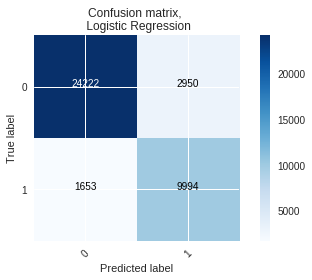

In [105]:
cnf_matrix = confusion_matrix(y_test, pva_pred_log)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, \n Logistic Regression')

In [107]:
print(classification_report(y_test, pva_pred_log))

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91     27172
         1.0       0.77      0.86      0.81     11647

   micro avg       0.88      0.88      0.88     38819
   macro avg       0.85      0.87      0.86     38819
weighted avg       0.89      0.88      0.88     38819



In [108]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
roc_auc_score(y_test, pva_pred_log)

0.8747536988104778

In [109]:
# accuracy of model
accuracy_score(y_test, pva_pred_log)

0.8814240449264535

# *Decision Tree*

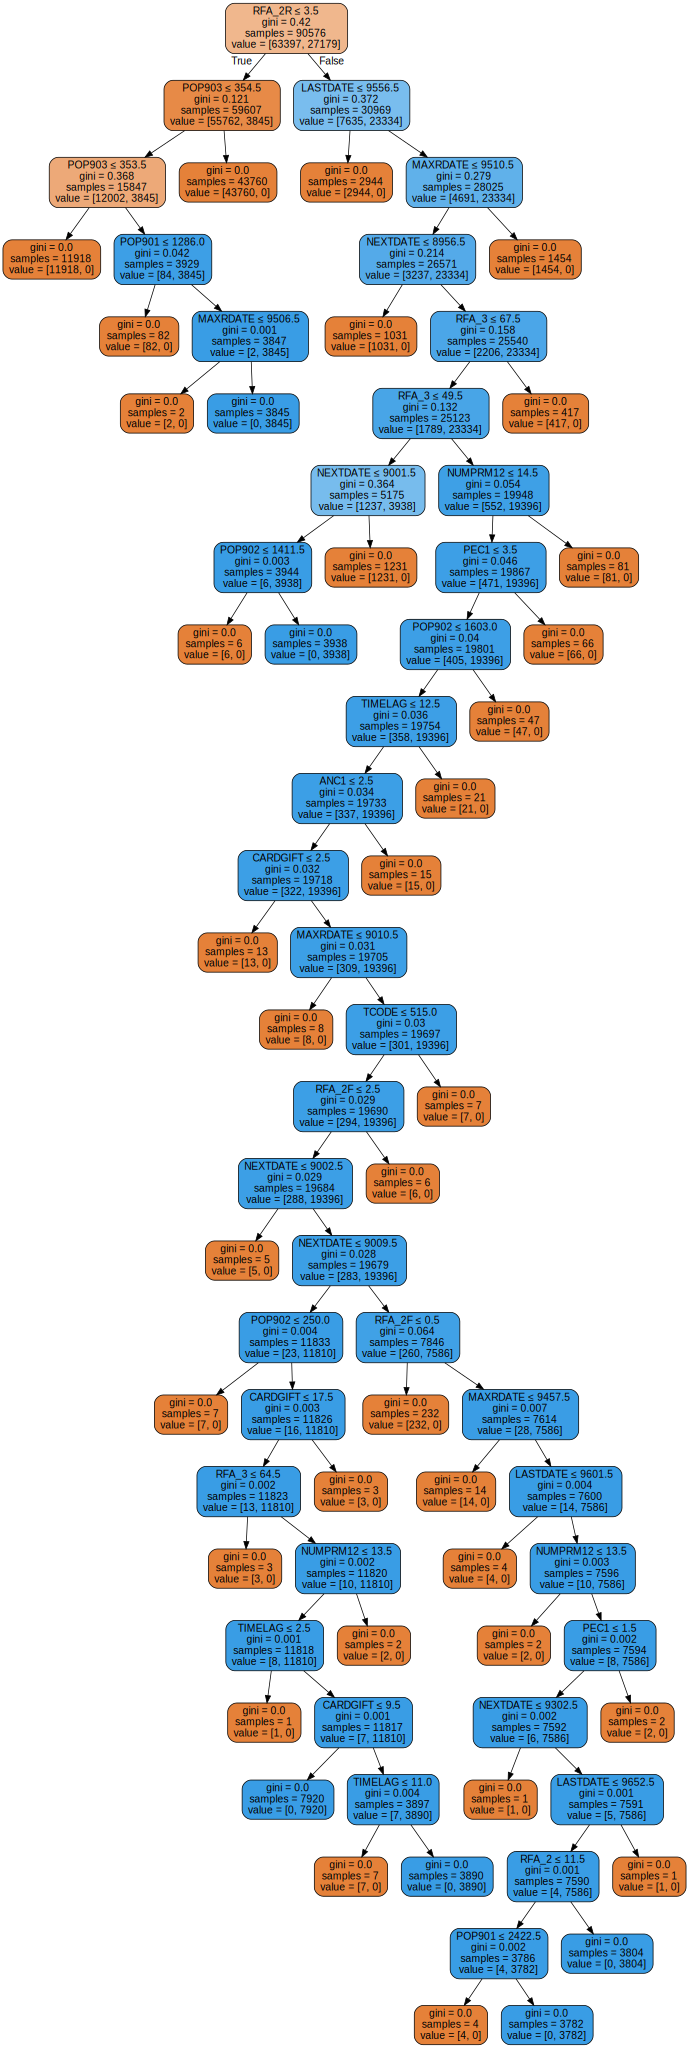

In [143]:
from sklearn import tree
import graphviz
clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf_dt,feature_names=X_train.columns, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

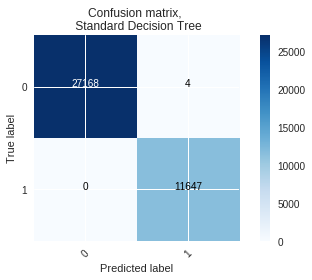

In [144]:
pva_pred_dt = clf_dt.predict(X_test)

cnf_matrix = confusion_matrix(y_test, pva_pred_dt)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, \n Standard Decision Tree')

In [145]:
clf_dt2 = tree.DecisionTreeClassifier()
params_dt = {'criterion': ['gini', 'entropy'],'min_samples_split': [2,5,10], 'min_samples_leaf': [2,3,5]}
clf_gs_dt = GridSearchCV(clf_dt2, params_dt, cv=5, return_train_score=True)
clf_gs_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [0]:
dt_params = clf_gs_dt.cv_results_['params'][clf_gs_dt.best_index_]

In [0]:
clf_dt_opt = tree.DecisionTreeClassifier(criterion=dt_params['criterion'], min_samples_split=dt_params['min_samples_split'], min_samples_leaf=dt_params['min_samples_leaf'])
clf_dt_opt = clf_dt_opt.fit(X_train, y_train)

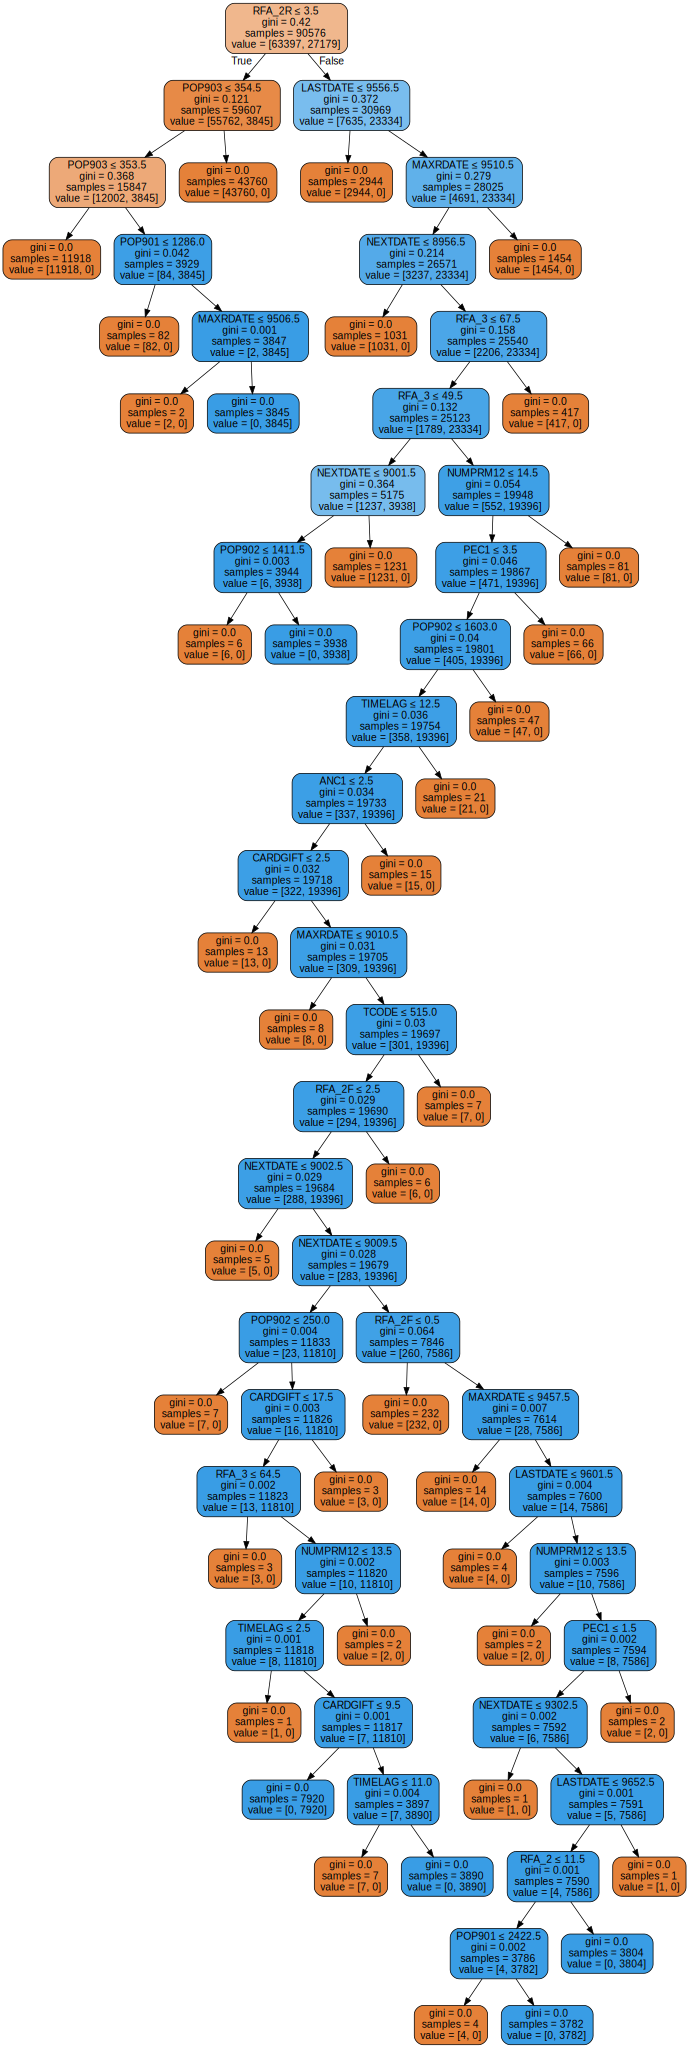

In [150]:
dot_data = tree.export_graphviz(clf_dt, out_file=None, feature_names=X_train.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

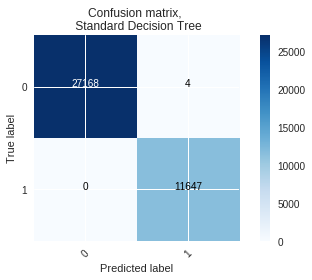

In [151]:
pva_pred_dt_opt = clf_dt_opt.predict(X_test)

cnf_matrix = confusion_matrix(y_test, pva_pred_dt_opt)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, \n Standard Decision Tree')

In [152]:
print(classification_report(y_test,pva_pred_dt))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27172
         1.0       1.00      1.00      1.00     11647

   micro avg       1.00      1.00      1.00     38819
   macro avg       1.00      1.00      1.00     38819
weighted avg       1.00      1.00      1.00     38819



In [112]:
roc_auc_score(y_test, pva_pred_dt)

0.9999447961136464

In [75]:
accuracy_score(y_test, pva_pred_dt)

0.9999227182565239

In [154]:
print(classification_report(y_test, pva_pred_dt_opt))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27172
         1.0       1.00      1.00      1.00     11647

   micro avg       1.00      1.00      1.00     38819
   macro avg       1.00      1.00      1.00     38819
weighted avg       1.00      1.00      1.00     38819



In [155]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

roc_auc_score(y_test, pva_pred_dt_opt)

0.9999263948181951

In [156]:
# accuracy of model
accuracy_score(y_test, pva_pred_dt_opt)

0.9998969576753651

# *Random Forest*

In [114]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=1000,random_state =111)
clf = clf.fit(X_train, y_train) 

from sklearn.metrics import r2_score
predicted_train = clf.predict(X_train)
train_score = r2_score(y_train, predicted_train)
print('Train data R-2 score:',train_score )

predicted_test = clf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
print('Test data R-2 score:',test_score )


importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, 
                          columns=["Importance"])
importance.sort_values(by='Importance',ascending= False)

Train data R-2 score: 0.9999736551322379
Test data R-2 score: 0.9996677769160095


,Importance
RFA_2R,0.271614
RFA_2,0.243930
POP903,0.184546
LASTDATE,0.097746
NEXTDATE,0.074367
MAXRDATE,0.056504
RFA_3,0.037398
POP902,0.010575
RFA_2F,0.006723
POP901,0.004807


In [0]:
clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf = clf_rf.fit(X_train, y_train)

In [0]:
pva_pred_rf = clf_rf.predict(X_test)

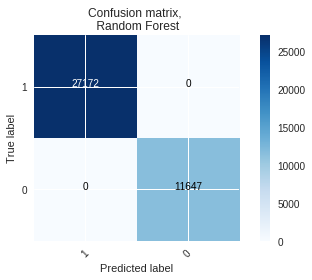

In [124]:
cnf_matrix = confusion_matrix(y_test, pva_pred_rf)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,0],
                      title='Confusion matrix, \n Random Forest')

In [126]:
print(classification_report(y_test, pva_pred_rf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27172
         1.0       1.00      1.00      1.00     11647

   micro avg       1.00      1.00      1.00     38819
   macro avg       1.00      1.00      1.00     38819
weighted avg       1.00      1.00      1.00     38819



In [128]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
roc_auc_score(y_test, pva_pred_rf)

1.0

In [129]:
# accuracy of model
accuracy_score(y_test, pva_pred_rf)

1.0

In [130]:
params_rf = {"n_estimators":[100, 200, 300], "criterion":["gini","entropy"], "max_depth":[2,3,5,7]}
clf_gs_rf = GridSearchCV(clf_rf, params_rf, cv=5, return_train_score=True)
clf_gs_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [131]:
rf_params = clf_gs_rf.cv_results_['params'][clf_gs_rf.best_index_]
rf_params

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 200}

In [0]:
clf_rf_opt = RandomForestClassifier(criterion=rf_params["criterion"], max_depth=rf_params["max_depth"], n_estimators=rf_params["n_estimators"])
clf_rf_opt = clf_rf_opt.fit(X_train, y_train)
pva_pred_rf_opt = clf_rf_opt.predict(X_test)

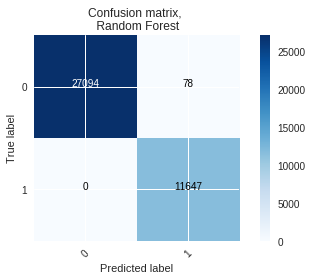

In [134]:
cnf_matrix = confusion_matrix(y_test, pva_pred_rf_opt)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, \n Random Forest')

In [136]:
print(classification_report(y_test, pva_pred_rf_opt))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27172
         1.0       0.99      1.00      1.00     11647

   micro avg       1.00      1.00      1.00     38819
   macro avg       1.00      1.00      1.00     38819
weighted avg       1.00      1.00      1.00     38819



In [137]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
roc_auc_score(y_test, pva_pred_rf_opt)

0.9985646989548065

In [138]:
# accuracy of model
accuracy_score(y_test, pva_pred_rf_opt)

0.9979906746696205